# Purpose is to Analyze the Electricity Data and find insights



Load Packages & Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
import os
import time

from matplotlib import rcParams
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from __future__ import print_function, division
from six import iteritems
%matplotlib inline
rcParams['figure.figsize'] = (13, 6)
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.models import Model, Sequential
from keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error


## Load All the sub-meter power data

In [ ]:
file_path = "/content/drive/MyDrive/AA USD/AAI 530 IOT/IOT Project /dataverse_files/Electricity_S.csv"
df = pd.read_csv(file_path)
df.head()

,UNIX_TS,WHE,RSE,GRE,MHE,B1E,BME,CWE,DWE,EQE,...,WOE,B2E,CDE,DNE,EBE,FGE,HTE,OUE,TVE,UNE
0,1333263600,1037,66,63,908,9,359,0,0,54,...,2,59,0,54,0,10,9,0,60,0
1,1333263660,1028,63,63,902,9,361,0,0,46,...,2,59,0,54,0,10,9,0,59,0
2,1333263720,993,63,63,867,9,361,0,0,54,...,2,15,0,54,0,10,9,0,59,0
3,1333263780,990,63,63,864,9,360,0,0,54,...,2,15,0,54,0,10,9,0,58,0
4,1333263840,988,61,63,864,9,359,0,0,54,...,2,14,0,55,0,10,9,0,59,0


In [ ]:
# Convert UNIX_TS to a readable date- time format
df['DateTime'] = pd.to_datetime(df['UNIX_TS'], unit='s')
df.set_index('DateTime', inplace=True)
df.drop('UNIX_TS', axis=1, inplace=True)
df.head()

,WHE,RSE,GRE,MHE,B1E,BME,CWE,DWE,EQE,FRE,...,WOE,B2E,CDE,DNE,EBE,FGE,HTE,OUE,TVE,UNE
DateTime,,,,,,,,,,,,,,,,,,,,,
2012-04-01 07:00:00,1037,66,63,908,9,359,0,0,54,157,...,2,59,0,54,0,10,9,0,60,0
2012-04-01 07:01:00,1028,63,63,902,9,361,0,0,46,159,...,2,59,0,54,0,10,9,0,59,0
2012-04-01 07:02:00,993,63,63,867,9,361,0,0,54,159,...,2,15,0,54,0,10,9,0,59,0
2012-04-01 07:03:00,990,63,63,864,9,360,0,0,54,158,...,2,15,0,54,0,10,9,0,58,0
2012-04-01 07:04:00,988,61,63,864,9,359,0,0,54,158,...,2,14,0,55,0,10,9,0,59,0


## Data Exploration

In [ ]:
# Find out the shape of the dataset
df.shape

(1051200, 23)

#### Check Null Values
No nulls were found within this dataset

In [ ]:
# Find Nulls in dataset
# Count the number of missing values in each column
missing_values_count = df.isna().sum()

# Print the count of missing values
missing_values_count


WHE    0
RSE    0
GRE    0
MHE    0
B1E    0
BME    0
CWE    0
DWE    0
EQE    0
FRE    0
HPE    0
OFE    0
UTE    0
WOE    0
B2E    0
CDE    0
DNE    0
EBE    0
FGE    0
HTE    0
OUE    0
TVE    0
UNE    0
dtype: int64

### Visualize Data over time over entire dataset

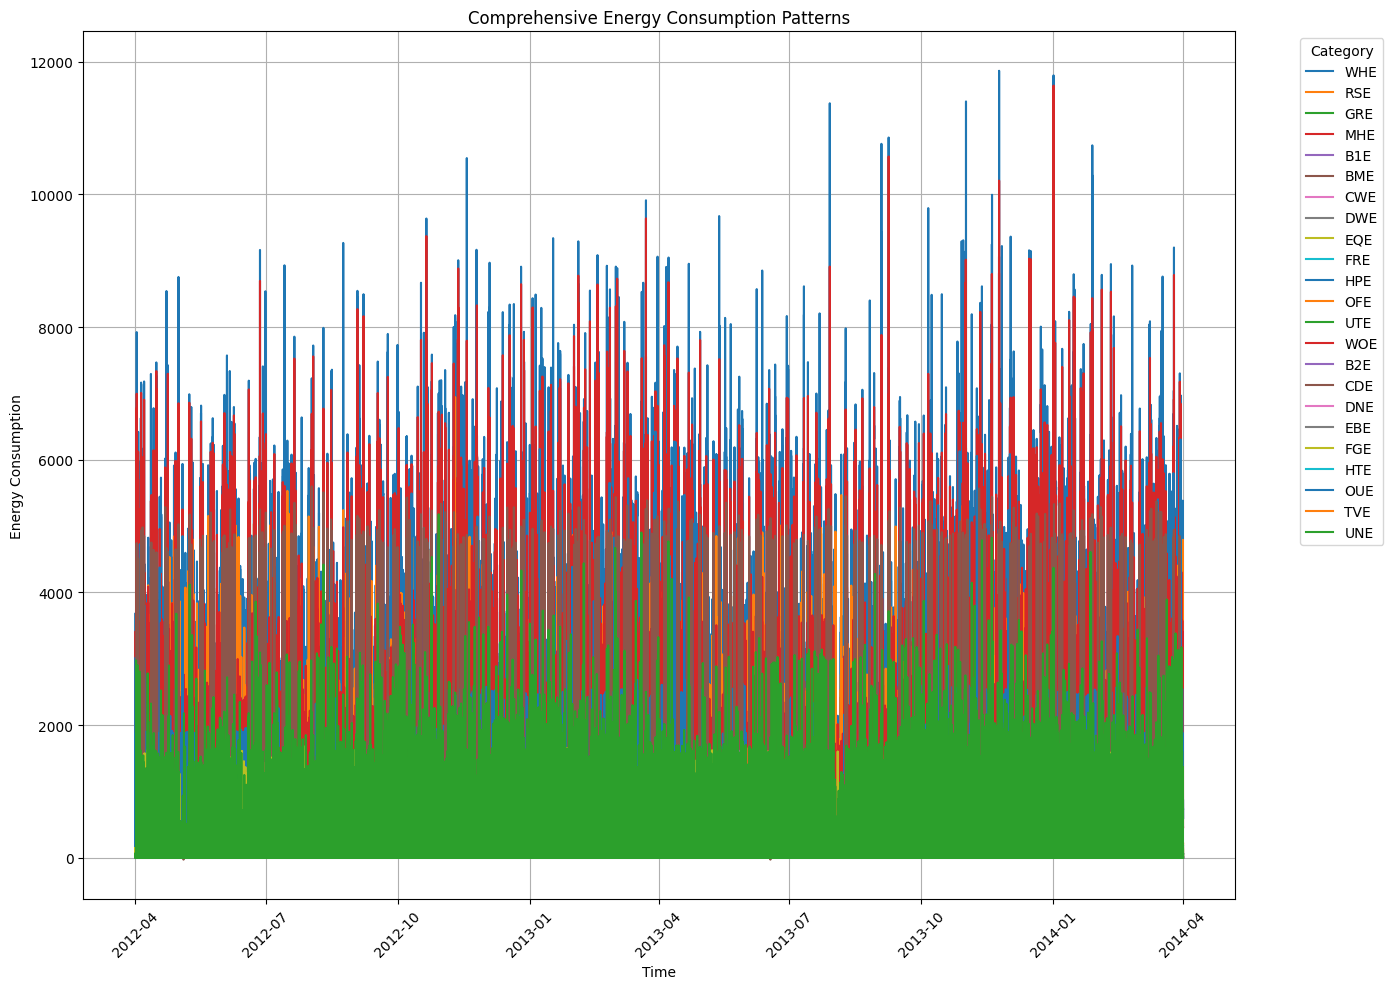

In [ ]:
# Dropping 'UNIX_TS' as we now have 'DateTime'
# columns_to_plot = df.columns.drop(['UNIX_TS','DateTime'])
columns_to_plot = df.columns
# columns_to_plot = df_subsample.columns.drop(['UNIX_TS', 'DateTime'])
plt.figure(figsize=(14, 10))
for column in columns_to_plot:
    plt.plot(df.index, df[column], label=column)

plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.title('Comprehensive Energy Consumption Patterns')
plt.xticks(rotation=45)
plt.yscale('linear')  # Apply Linear or logarithmic scale to the y-axis
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Visualize only 0.01% of Data as we are unable to see patterns at the granularity we have above.

In [ ]:
# Calculate the number of rows for .01% of the dataset
fraction_rows = int(len(df) * 0.0001)

# Subsample the first 10% of the data
df_subsample = df.iloc[:fraction_rows]


#### Drop out the 'WHE' and 'UNE' columns as 'WHE' measures the whole house and 'UNE' measures unmetered values

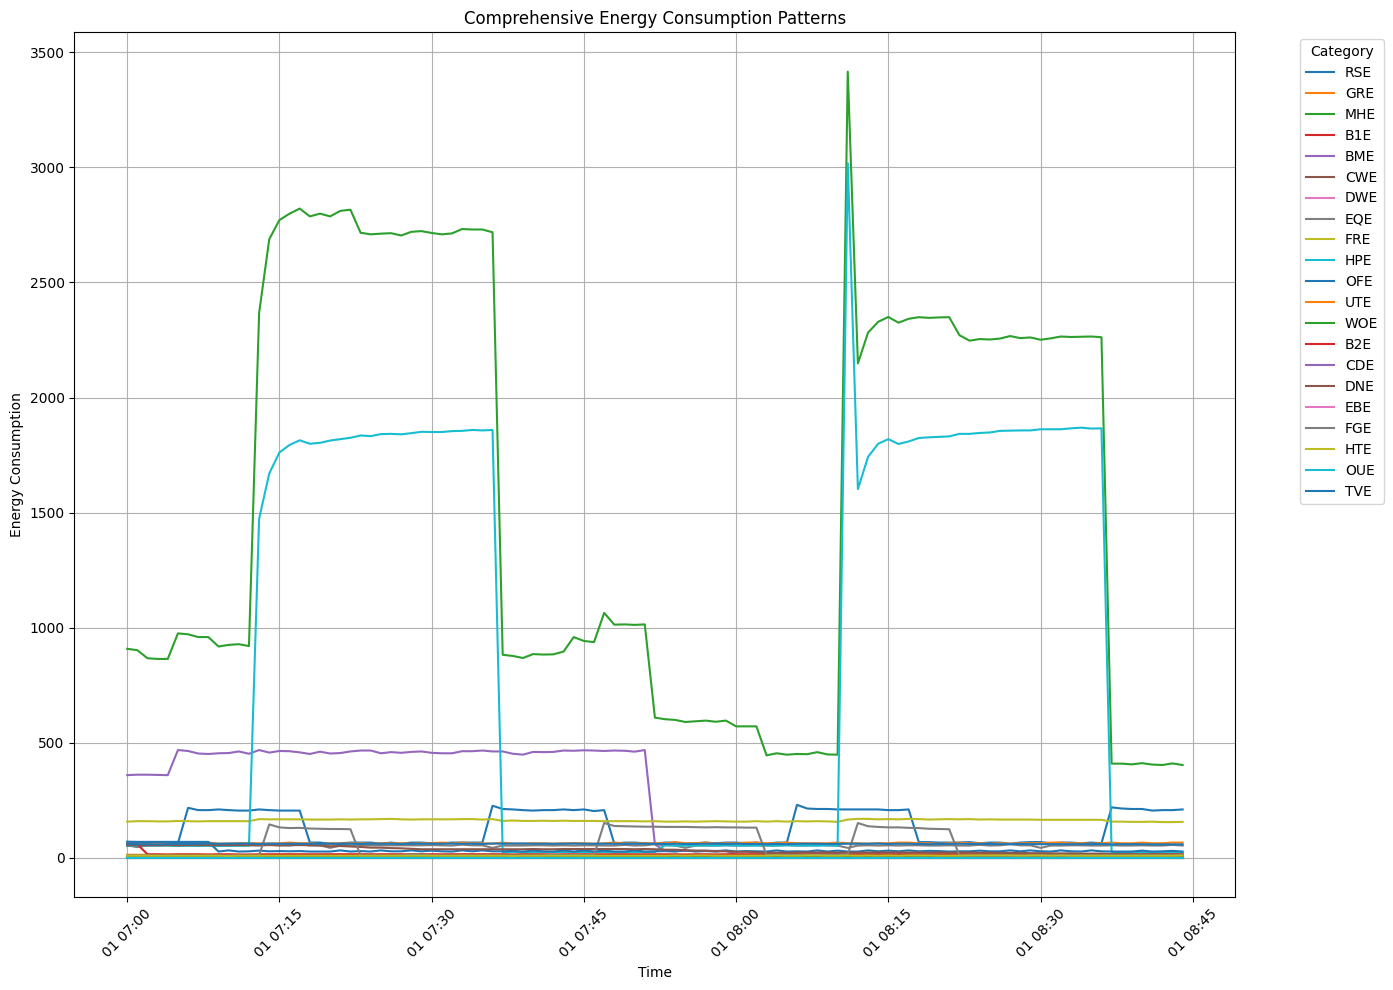

In [ ]:
# Dropping 'UNIX_TS' as we now have 'DateTime'
# columns_to_plot = df_subsample.columns.drop(['UNIX_TS'])
columns_to_plot = df_subsample.columns.drop(['WHE','UNE'])
# columns_to_plot = df_subsample.columns.drop(['UNIX_TS', 'DateTime'])
plt.figure(figsize=(14, 10))
for column in columns_to_plot:
    plt.plot(df_subsample.index, df_subsample[column], label=column)

plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.title('Comprehensive Energy Consumption Patterns')
plt.xticks(rotation=45)
plt.yscale('linear')  # Apply logarithmic scale to the y-axis
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Now we want to try with 'WHE' and 'UNE'

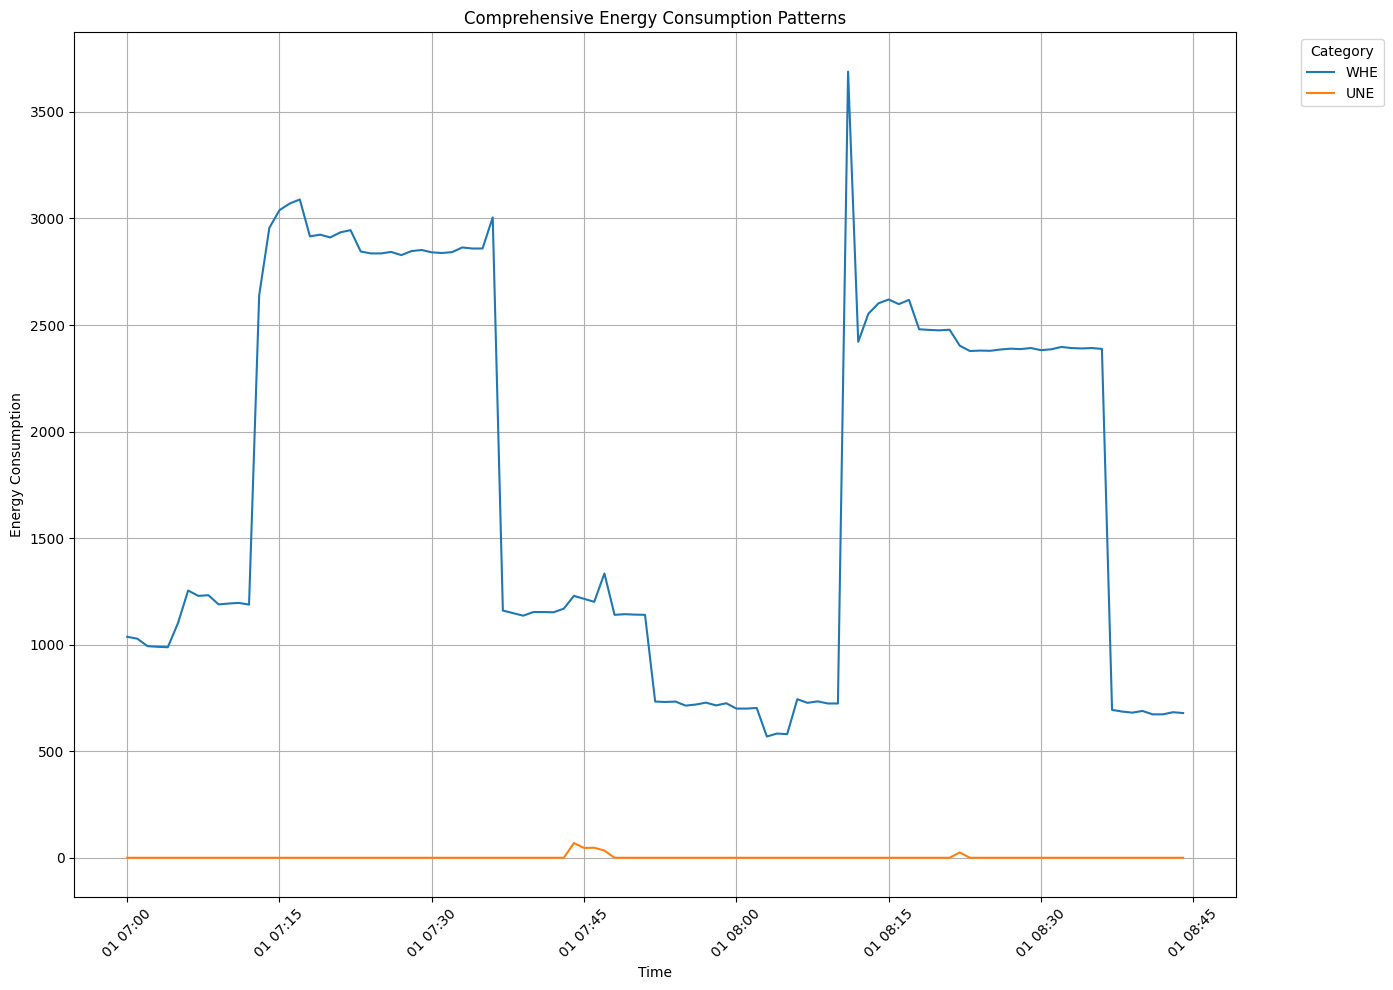

In [ ]:
# Dropping 'UNIX_TS' as we now have 'DateTime'
# columns_to_plot = df_subsample.columns.drop(['UNIX_TS'])
columns_to_plot = ['WHE','UNE']
# columns_to_plot = df_subsample.columns.drop(['UNIX_TS', 'DateTime'])
plt.figure(figsize=(14, 10))
for column in columns_to_plot:
    plt.plot(df_subsample.index, df_subsample[column], label=column)

plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.title('Comprehensive Energy Consumption Patterns')
plt.xticks(rotation=45)
plt.yscale('linear')  # Apply logarithmic scale to the y-axis
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Data Analysis

I want to see if there was a correlation to the Total House consumption versus separate appliances. It seems that The whole house has highly correlated relationships with some appliances.



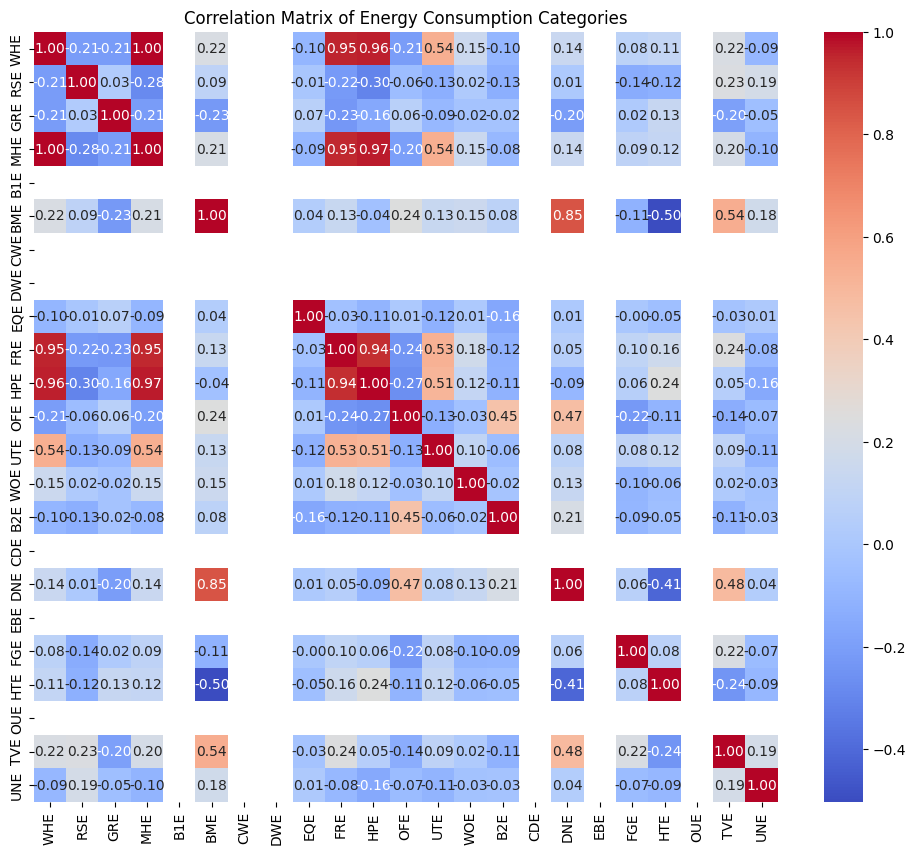

In [ ]:
# First, ensure all data is numeric. If necessary, convert categorical data or exclude non-numeric columns
columns_for_correlation = df_subsample.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix
correlation_matrix = df_subsample[columns_for_correlation].corr()

# Visualizing the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Energy Consumption Categories')
plt.show()

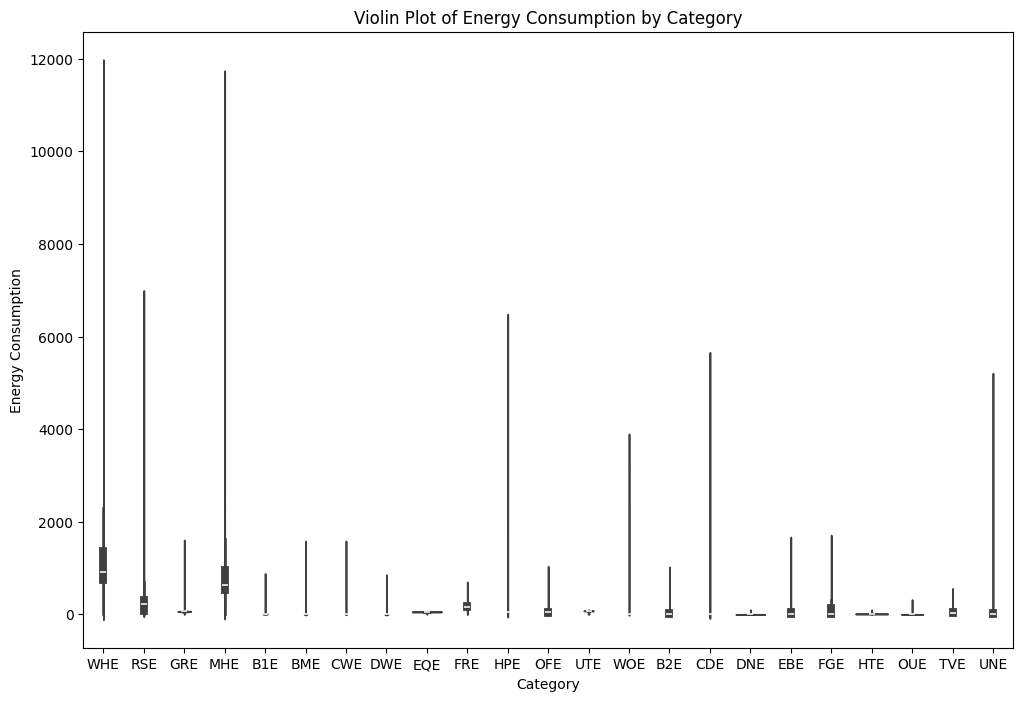

In [ ]:
# Select columns for the violin plot for better visibility
columns_for_violin = df_subsample.columns

# Preparing the data for violin plot; melting the DataFrame to long format
df_long = pd.melt(df[columns_for_violin], var_name='Category', value_name='Energy Consumption')

# Creating the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Category', y='Energy Consumption', data=df_long)
plt.title('Violin Plot of Energy Consumption by Category')
plt.xlabel('Category')
plt.ylabel('Energy Consumption')
plt.show()

## Aggregate data to Hourly Analysis

We will use hourly data for our modeling

In [ ]:
df_hourly = df.resample('H').sum()
df_hourly.head()

,WHE,RSE,GRE,MHE,B1E,BME,CWE,DWE,EQE,FRE,...,WOE,B2E,CDE,DNE,EBE,FGE,HTE,OUE,TVE,UNE
DateTime,,,,,,,,,,,,,,,,,,,,,
2012-04-01 07:00:00,107450,7312,3781,96357,540,23689,0,0,3195,9733,...,122,980,0,2617,0,3325,541,0,3649,196
2012-04-01 08:00:00,87170,7246,3809,76115,540,843,0,0,3185,9636,...,122,890,0,1103,0,3071,559,0,3561,45
2012-04-01 09:00:00,87020,7432,3814,75774,540,842,0,0,3196,9676,...,121,886,0,353,0,1919,567,0,3591,56
2012-04-01 10:00:00,87288,7126,3831,76331,540,842,0,0,3208,9649,...,127,888,0,295,0,3849,560,0,3556,23
2012-04-01 11:00:00,96294,7829,3814,84651,540,843,0,0,3190,9707,...,126,888,0,297,0,2778,593,0,3569,84


In [ ]:
df_hourly.shape

(17520, 23)

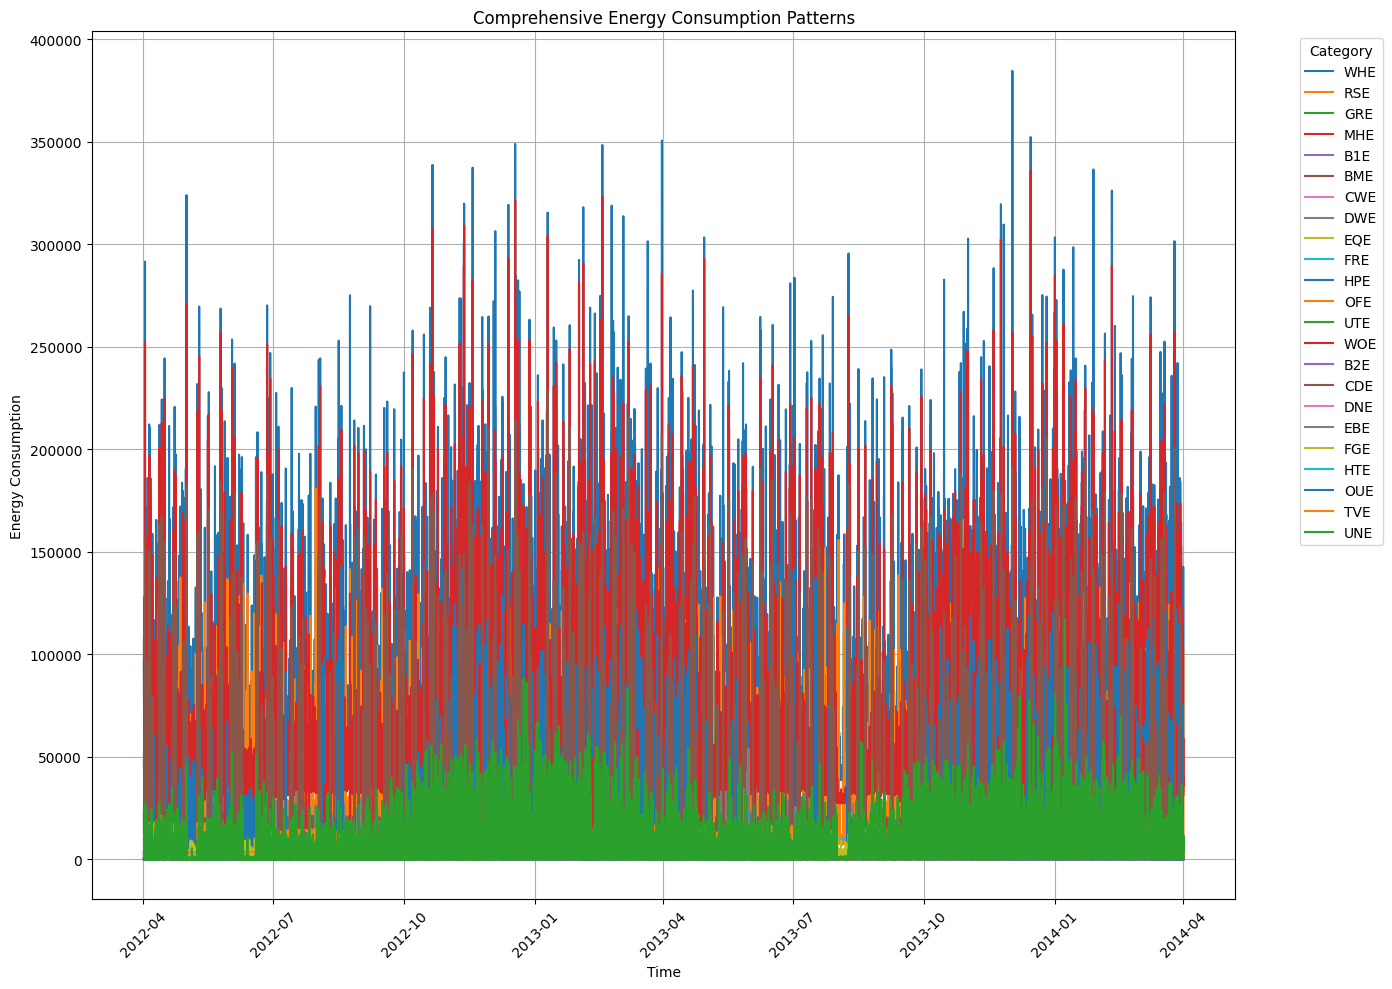

In [ ]:
# Dropping 'UNIX_TS' as we now have 'DateTime'
# columns_to_plot = df.columns.drop(['UNIX_TS','DateTime'])
columns_to_plot = df_hourly.columns
# columns_to_plot = df_subsample.columns.drop(['UNIX_TS', 'DateTime'])
plt.figure(figsize=(14, 10))
for column in columns_to_plot:
    plt.plot(df_hourly.index, df_hourly[column], label=column)

plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.title('Comprehensive Energy Consumption Patterns')
plt.xticks(rotation=45)
plt.yscale('linear')  # Apply Linear or logarithmic scale to the y-axis
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Visualize 1% of the data

We would be able to see better visualizations due to a smaller dataset and it would fit a graph as compared to above.

In [ ]:
# Calculate the number of rows for 1% of the dataset
fraction_rows = int(len(df_hourly) * 0.01)

# Subsample the first 10% of the data
df_subsample = df_hourly.iloc[:fraction_rows]

df_subsample.shape

(175, 23)

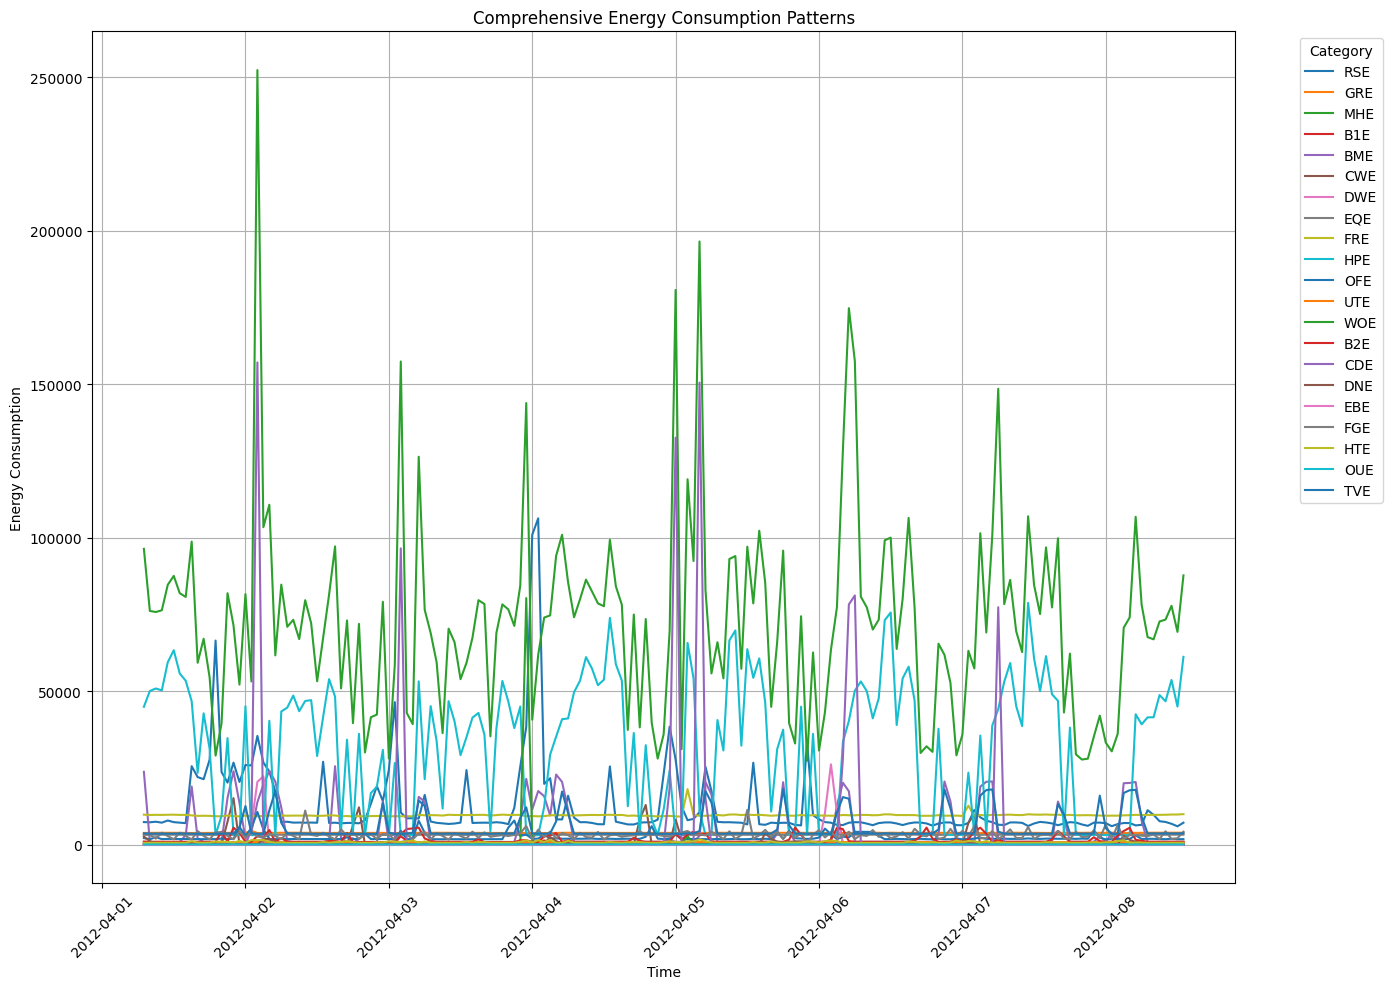

In [ ]:
# Dropping 'UNIX_TS' as we now have 'DateTime'
# columns_to_plot = df_subsample.columns.drop(['UNIX_TS'])
columns_to_plot = df_subsample.columns.drop(['WHE','UNE'])
# columns_to_plot = df_subsample.columns.drop(['UNIX_TS', 'DateTime'])
plt.figure(figsize=(14, 10))
for column in columns_to_plot:
    plt.plot(df_subsample.index, df_subsample[column], label=column)

plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.title('Comprehensive Energy Consumption Patterns')
plt.xticks(rotation=45)
plt.yscale('linear')  # Apply logarithmic scale to the y-axis
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

## Monthly Data

We won't use monthly aggregated data in modeling as hourly seems to fit better in the daily use of our project.

In [ ]:
df_monthly = df.resample('M').sum()
df_monthly.head(12)

,WHE,RSE,GRE,MHE,B1E,BME,CWE,DWE,EQE,FRE,...,WOE,B2E,CDE,DNE,EBE,FGE,HTE,OUE,TVE,UNE
DateTime,,,,,,,,,,,,,,,,,,,,,
2012-04-30,56209343,10482493,2713953,43012897,419010,2639957,278993,645011,2260135,6870640,...,644714,1204299,2293227,125084,0,2320461,526689,859,3815221,2236092
2012-05-31,51535474,11574088,2854329,37107057,431227,2607514,280007,654768,2354316,7027534,...,216215,944277,2210847,75084,0,2496035,553794,1785,3378825,2126725
2012-06-30,46189977,11738267,2757159,31694551,409785,2073042,408267,525570,2276149,6625206,...,253931,846010,3285633,70717,0,2454793,515791,3204,2950952,1828843
2012-07-31,48102481,12118367,2921598,33062516,424275,2149394,225667,726278,2426977,7401575,...,620392,1039012,1137150,118774,0,2946161,558080,14183,3606930,1642443
2012-08-31,52273708,11751545,2973501,37548662,432374,1934777,309028,590156,2450695,7824840,...,289103,1062708,1470660,126624,1316445,3043972,568575,49254,2629267,1820457
2012-09-30,47429940,11902846,2805044,32722050,418718,1063469,301444,550398,2309758,7362725,...,471605,1209408,2391865,34273,1739120,2697663,532435,44810,1616863,2414688
2012-10-31,58604221,12460572,2891476,43252173,440942,1585005,295290,442080,2380724,7024659,...,177827,1467274,2659176,46768,1803060,2490388,563083,56809,1846605,4147643
2012-11-30,67447694,12181608,2789449,52476637,426840,1605366,233955,632917,2311266,7170965,...,269705,1456753,2322740,73065,1764687,2245100,558003,46727,1864380,5276854
2012-12-31,63545893,12521022,2872769,48152102,457265,1638491,310426,606366,2398883,7641711,...,350086,1389169,2710983,105819,1823285,2269270,589267,31504,1919742,6349311


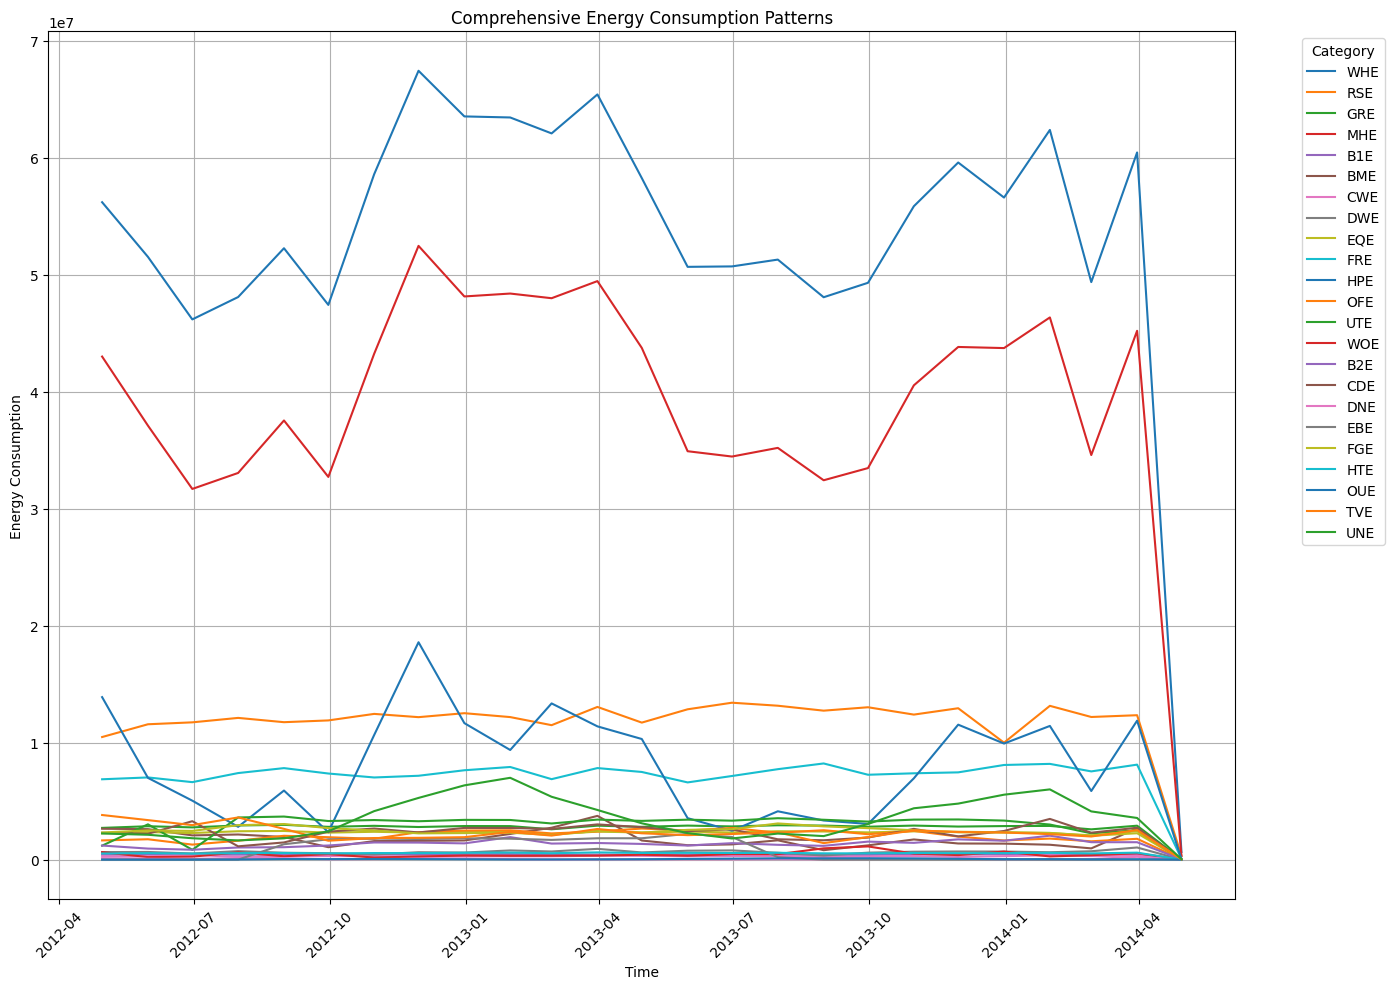

In [ ]:
# Dropping 'UNIX_TS' as we now have 'DateTime'
# columns_to_plot = df.columns.drop(['UNIX_TS','DateTime'])
columns_to_plot = df_monthly.columns
# columns_to_plot = df_subsample.columns.drop(['UNIX_TS', 'DateTime'])
plt.figure(figsize=(14, 10))
for column in columns_to_plot:
    plt.plot(df_monthly.index, df_monthly[column], label=column)

plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.title('Comprehensive Energy Consumption Patterns')
plt.xticks(rotation=45)
plt.yscale('linear')  # Apply Linear or logarithmic scale to the y-axis
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Total Energy Consumption by monthly to spot trends
we can see that there is some seasonality based on warmer months and higher consumption during colder months.

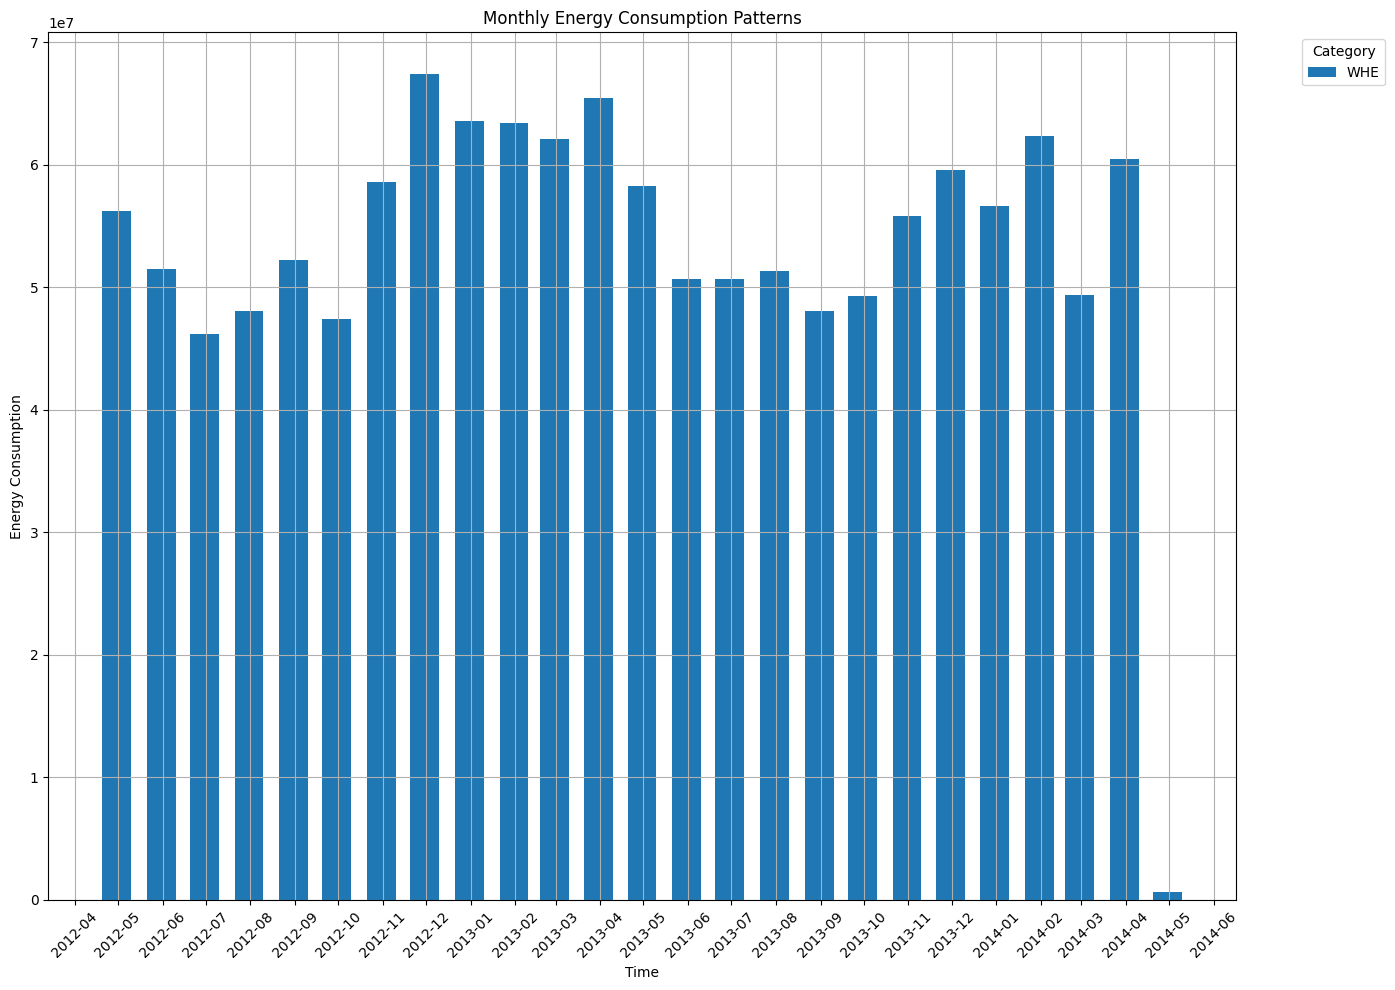

In [ ]:
columns_to_plot = ['WHE']

plt.figure(figsize=(14, 10))
for column in columns_to_plot:
    plt.bar(df_monthly.index, df_monthly[column], label=column, width=20)

plt.xlabel('Time')
plt.ylabel('Energy Consumption')
plt.title('Monthly Energy Consumption Patterns')
plt.xticks(rotation=45)
plt.yscale('linear')  # Applying linear scale to the y-axis
# Adjusting x-axis to display dates properly
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



Based on our findings, I chose to use Apparent Power (S) as the predictor for electricity. As it was recommended in the paper.
